# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lecture 11 (Logistic Regression \#2)

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>


---

In [3]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn as sk


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as met

In [5]:
df_heart = pd.read_csv('../data/Heart.csv')

df_heart['AHD'] = 1*(df_heart['AHD'] == "Yes")
df_heart['Interaction'] = df_heart['MaxHR']*df_heart['Sex']

df_heart.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Interaction
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,150
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,108
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,129
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,187
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,0


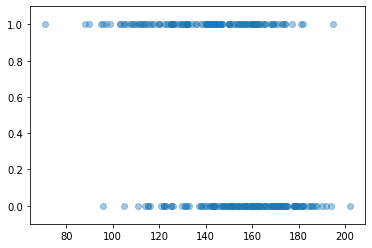

In [6]:
plt.plot(df_heart.MaxHR, df_heart.AHD, 'o', alpha=0.4)
plt.ylim(-0.1,1.1)
plt.show()

## Regularization in Logistic Regression

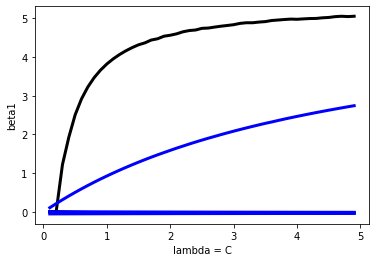

In [7]:
beta1_l1 = []
beta1_l2 = []
Cs = []

data_x = df_heart[['MaxHR','Sex','Interaction']]
data_y = df_heart['AHD']

for i in range(1, 50):
    C = i/10
    logitm_l1 = LogisticRegression(C = C, penalty = "l1", solver='liblinear',max_iter=200)
    logitm_l1.fit (data_x, data_y)
    logitm_l2 = LogisticRegression(C = C, penalty = "l2", solver='lbfgs')
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(np.array(Cs), beta1_l1,  color='black', lw=3)
plt.plot(np.array(Cs), beta1_l2,  color='blue', lw=3)
plt.xlabel ("lambda = C")
plt.ylabel("beta1")
plt.show()


## Multi-Class Logistic Regression (Multinomial)

[2 2 2 0 2 0 2 0 2 2 0 2 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 2 2 0 0 2 2 0 2 0 2 2 2 0 2 2 0 0 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 0 2
 2 2 2 0 0 2 0 2 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 0 2 0
 2 0 0 2 2 2 2 2 0 2 2 0 0 2 0 2 0 0 0 2 2 0 0 2 0 2 2 0 0 2 0 2 2 2 2 2 2
 0 0 0 2 2 0 0 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 0 0 2 0 2 0 2 2 2
 0 0 0 0 0 0 2 2 2 1 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 1 2
 0 0 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2 0 2 0 2 0 0 2 0 0
 2 0 0 0 0 2 0]


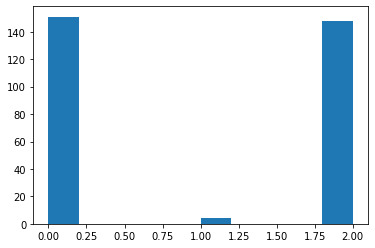

In [8]:
# Response for Multinomial Logistic Regression Example

print(df_heart.RestECG.values)
plt.hist(df_heart.RestECG.values)
plt.show()

In [9]:
# 'Multinomial' Logistic Regression Example

data_x = df_heart[['Sex']]

# 0 = normal; 1 = having ST-T; 2 = hypertrophy
data_y = df_heart['RestECG']

logitm = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='ovr')
logitm.fit(data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)



Estimated beta1: 
 [[-0.04003728]
 [-1.87833213]
 [ 0.1445807 ]]
Estimated beta0: 
 [ 0.02061932 -3.44468483 -0.14458062]


In [10]:
logitm2 = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='multinomial')
logitm2.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm2.coef_)
print('Estimated beta0: \n', logitm2.intercept_)

Estimated beta1: 
 [[ 0.57896717]
 [-1.25284168]
 [ 0.67387452]]
Estimated beta0: 
 [ 0.95944398 -1.83373675  0.87429277]


In [11]:
logitm3 = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='ovr')
logitm3.fit(df_heart[['Sex','MaxHR','Interaction']], df_heart['RestECG'])
# The coefficients
print('Estimated beta1: \n', logitm3.coef_)
print('Estimated beta0: \n', logitm3.intercept_)

Estimated beta1: 
 [[ 4.25808787e-01  1.07602095e-02 -2.95771639e-03]
 [-9.13968825e+00 -6.82088644e-02  5.38609369e-02]
 [ 5.16334353e-01 -4.34882213e-03 -2.63344224e-03]]
Estimated beta0: 
 [-1.60699206  5.89048174  0.5211584 ]


In [12]:
X=np.arange(0,2)
print("For OVR Logistic Regression:")
print(logitm.predict_proba(X.reshape(-1,1)))
print(logitm.predict(X.reshape(-1,1)))

print("For Multinomial Logistic Regression:")
print(logitm2.predict_proba(X.reshape(-1,1)))
print(logitm2.predict(X.reshape(-1,1)))

For OVR Logistic Regression:
[[0.5051546  0.03092776 0.46391764]
 [0.49514565 0.00485434 0.50000001]]
[0 2]
For Multinomial Logistic Regression:
[[0.50515267 0.03092856 0.46391877]
 [0.49514568 0.00485429 0.50000003]]
[0 2]


## Confusion Matrices and ROC Curves

In [13]:
logitm.fit(df_heart[['Sex','MaxHR','Interaction']], df_heart['AHD']);

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 5.41531038 -0.02659031 -0.02707268]]
Estimated beta0: 
 [2.90174056]


In [28]:
#calculating confusion matrices

yhat = logitm.predict_proba(df_heart[['Sex','MaxHR','Interaction']])[:,1]

print('The average predicted probability is',np.mean(yhat))

print('The confusion matrix when cut-off is 0.5: \n',met.confusion_matrix(df_heart['AHD'], yhat>0.5))
print('The confusion matrix when cut-off is',np.mean(yhat),'\n',met.confusion_matrix(df_heart['AHD'], yhat>np.mean(yhat)))
print('The confusion matrix when cut-off is 0.75: \n',met.confusion_matrix(df_heart['AHD'], yhat>0.72))


The average predicted probability is 0.45873169682440607
The confusion matrix when cut-off is 0.5: 
 [[132  32]
 [ 56  83]]
The confusion matrix when cut-off is 0.45873169682440607 
 [[122  42]
 [ 47  92]]
The confusion matrix when cut-off is 0.75: 
 [[156   8]
 [ 89  50]]


array([0.56650416, 0.92563178, 0.80131366, 0.15213818, 0.15818521,
       0.22531422, 0.20542772, 0.19271246, 0.60553721, 0.49982181,
       0.59264926, 0.23747417, 0.66750147, 0.27554941, 0.40700664,
       0.2649671 , 0.33218223, 0.43314581, 0.31124331, 0.29748131,
       0.64326881, 0.19688307, 0.43314581, 0.27554941, 0.77443687,
       0.21424428, 0.15818521, 0.46765641, 0.29748131, 0.9002019 ,
       0.24723815, 0.43314581, 0.45966242, 0.42002014, 0.21608571,
       0.22531422, 0.86732278, 0.90943831, 0.77443687, 0.72416594,
       0.46765641, 0.22531422, 0.19688307, 0.47301656, 0.16909953,
       0.36880596, 0.84767785, 0.80971941, 0.2187546 , 0.5399835 ,
       0.17286854, 0.69087904, 0.52662809, 0.14534453, 0.64326881,
       0.92185233, 0.39412235, 0.45966242, 0.5399835 , 0.83329709,
       0.2944052 , 0.20542772, 0.78367272, 0.16539626, 0.90492043,
       0.66750147, 0.49982181, 0.36880596, 0.69087904, 0.60553721,
       0.26238174, 0.39412235, 0.95277317, 0.45966242, 0.23481

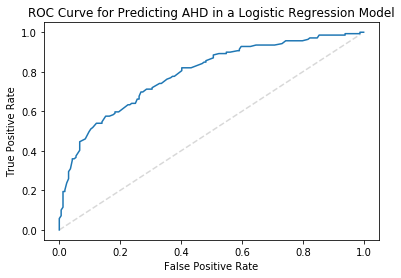

In [15]:
#ROC curve on the train set

fpr, tpr, thresholds = met.roc_curve(df_heart['AHD'], yhat)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting AHD in a Logistic Regression Model")
plt.show()

## Regularization Example

In [17]:
df_toy2 = pd.read_csv('../data/toy_example2.csv')
df_toy2.head()

,y,x1,x2
0,0,0.720904,0.209351
1,0,0.875773,0.766238
2,0,0.760982,0.841616
3,0,0.886125,0.934126
4,0,0.456481,0.675824


In [18]:

from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=100000,solver='lbfgs')
logreg.fit(df_toy2[['x1','x2']], df_toy2['y'])

beta = logreg.coef_
beta0 = logreg.intercept_

print('Estimated beta1: \n', beta)
print('Estimated beta0: \n', beta0)



Estimated beta1: 
 [[ -4.42580954 -13.20694654]]
Estimated beta0: 
 [6.91475982]


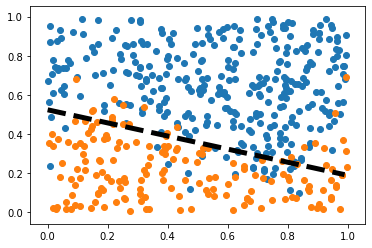

In [19]:


plt.scatter(df_toy2['x1'][df_toy2['y']==0],df_toy2['x2'][df_toy2['y']==0])
plt.scatter(df_toy2['x1'][df_toy2['y']==1],df_toy2['x2'][df_toy2['y']==1])

dummy_x1 = np.arange(0,1,0.01)
dummy_x2 = (beta[0,0]*dummy_x1+beta0)/-beta[0,1]

plt.plot(dummy_x1,dummy_x2,'--',c="black",lw=5)
plt.show()

In [20]:
X = df_toy2[['x1','x2']]

logreg2 = LogisticRegression(C=100000,solver='liblinear')
poly = sk.preprocessing.PolynomialFeatures(10)
X_poly = poly.fit_transform(X)


logreg2.fit(X_poly, df_toy2['y'])

logreg2.coef_

array([[   2.04932587,   26.2296449 ,  -23.83568896,  -94.58930599,
          -0.48134937,   97.15554017,  123.138271  ,  -89.40229182,
         104.30320286, -164.77784583,   -5.51722745,   13.16055954,
         -29.62675233,  -37.65887958,  -44.09906201,  -75.42136708,
          36.62284499,   -9.98473025, -102.41234466,  -30.16735688,
          87.46343962,  -43.22021406,   51.86483621,   -5.95298612,
         -50.63460316,  -80.51940294,    1.8584568 ,  113.25323031,
          20.20967889,   52.99120771,    3.53907827,  -14.73486039,
         -27.18073929,  -45.49157781,   10.56271352,   64.46502985,
          56.16361331,   24.88199554,   13.23160506,   18.30406954,
          15.1446611 ,   -4.18356542,  -28.17938362,   -0.5598653 ,
          -8.44592497,   38.89699926,  -34.24175115,   16.01037332,
          50.12183582,   52.53100918,   31.75651221,    1.3004076 ,
         -26.71969736,  -18.76660228,  -73.99202947,  -33.20863572,
        -116.53231621,   10.94244378,   79.15889

In [21]:
dummy_x1 = np.arange(0,1.001,0.001)

def find_boundary(dummy_x, model, poly):
   
    yhat = []
    
    for x_i in dummy_x:
        dummy_x1 = np.repeat(x_i,dummy_x.size)
        df_X = pd.DataFrame(np.array([dummy_x1,dummy_x]).transpose())
        df_X2 = poly.fit_transform(df_X)
        yhat.append(dummy_x[np.sum(model.predict(df_X2))])
      
    return yhat

                    
dummy_x2 = find_boundary(dummy_x1, logreg2, poly)


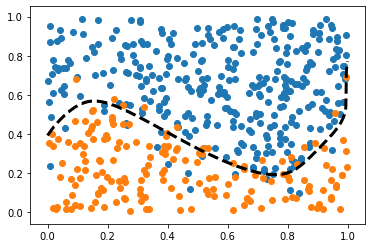

In [22]:
plt.scatter(df_toy2['x1'][df_toy2['y']==0],df_toy2['x2'][df_toy2['y']==0])
plt.scatter(df_toy2['x1'][df_toy2['y']==1],df_toy2['x2'][df_toy2['y']==1])

plt.plot(dummy_x1,dummy_x2,'--',c="black",lw=3)
plt.show()

In [23]:
Cs = 10.0**np.arange(-5,5)

logregCV = LogisticRegressionCV(Cs = Cs,cv=5,solver='liblinear',penalty='l1')

logregCV.fit(X_poly, df_toy2['y']);

In [24]:
print(logregCV.coef_)
#print(logregCV.scores_)
#print(logregCV.coefs_paths_)

[[  1.66520032  15.13821703  -1.22842876 -29.0355352    0.89965774
   -8.82296399   0.         -35.60451891   0.          -7.16829669
    3.96345694   0.         -18.15875114  -1.03893277   0.
   11.54088302  10.79178514   0.           0.           0.
    0.           5.76093633  21.82608405   0.           0.
    0.           0.           0.           0.           3.06575926
    0.           0.           0.           0.           0.
    0.           0.           0.           3.46026205   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
   -4.95053246   0.           0.          23.67256289   0.
    0.           0.           0.           0.           0.
    0.        ]]


In [25]:
dummy_x2 = (beta[0,0]*dummy_x1+beta0)/-beta[0,1]
dummy_x2poly = find_boundary(dummy_x1, logreg2, poly)
dummy_x2CV = find_boundary(dummy_x1, logregCV, poly)

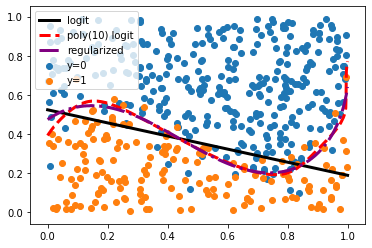

In [26]:
plt.scatter(df_toy2['x1'][df_toy2['y']==0],df_toy2['x2'][df_toy2['y']==0])
plt.scatter(df_toy2['x1'][df_toy2['y']==1],df_toy2['x2'][df_toy2['y']==1])

plt.plot(dummy_x1,dummy_x2,c="black",lw=3)
plt.plot(dummy_x1,dummy_x2poly,'--',c="red",lw=3)
plt.plot(dummy_x1,dummy_x2CV,'-.',c="purple",lw=3)
plt.legend(['logit','poly(10) logit','regularized','y=0','y=1'])
plt.rcParams["figure.figsize"] = [10,6]
plt.show()